In [2]:
cd /Users/YINAN/Documents/Code/Pycharm/Sealion/

/Users/YINAN/Documents/Code/Pycharm/Sealion


In [3]:
from ast import literal_eval
import pandas as pd
import src.utils
import cv2
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import keras
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
%matplotlib inline

Using TensorFlow backend.
/Users/YINAN/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [4]:
# model_path = '/Users/YINAN/Documents/Code/Pycharm/Sealion/saved/checkpoint.hdf5'
model_path = '/Users/YINAN/Documents/Code/Pycharm/Sealion/saved/transfer_vgg16/checkpoint_best.hdf5'
test_data_path = '/Users/YINAN/Local/Sea-lions/Patches/test/'
model = keras.models.load_model(model_path)

In [5]:
test_datagen = ImageDataGenerator(
        rescale=1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_data_path,
        target_size=(96,96),
        batch_size=50,
        shuffle=False) 

Found 97666 images belonging to 6 classes.


In [ ]:
pred_prob = model.predict_generator(test_generator)
pred_classes = np.array([x.argmax() for x in pred_prob])

In [7]:
mc = confusion_matrix(test_generator.classes, pred_classes)

In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] + 1e-6
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



# MODEL EVALUATION

Our model scores:  

loss 0.5228664181066675  
acc 0.8361046833084185  

VGG16 model scores:  

loss 0.3565803895007639  
acc 0.8961870046894518  

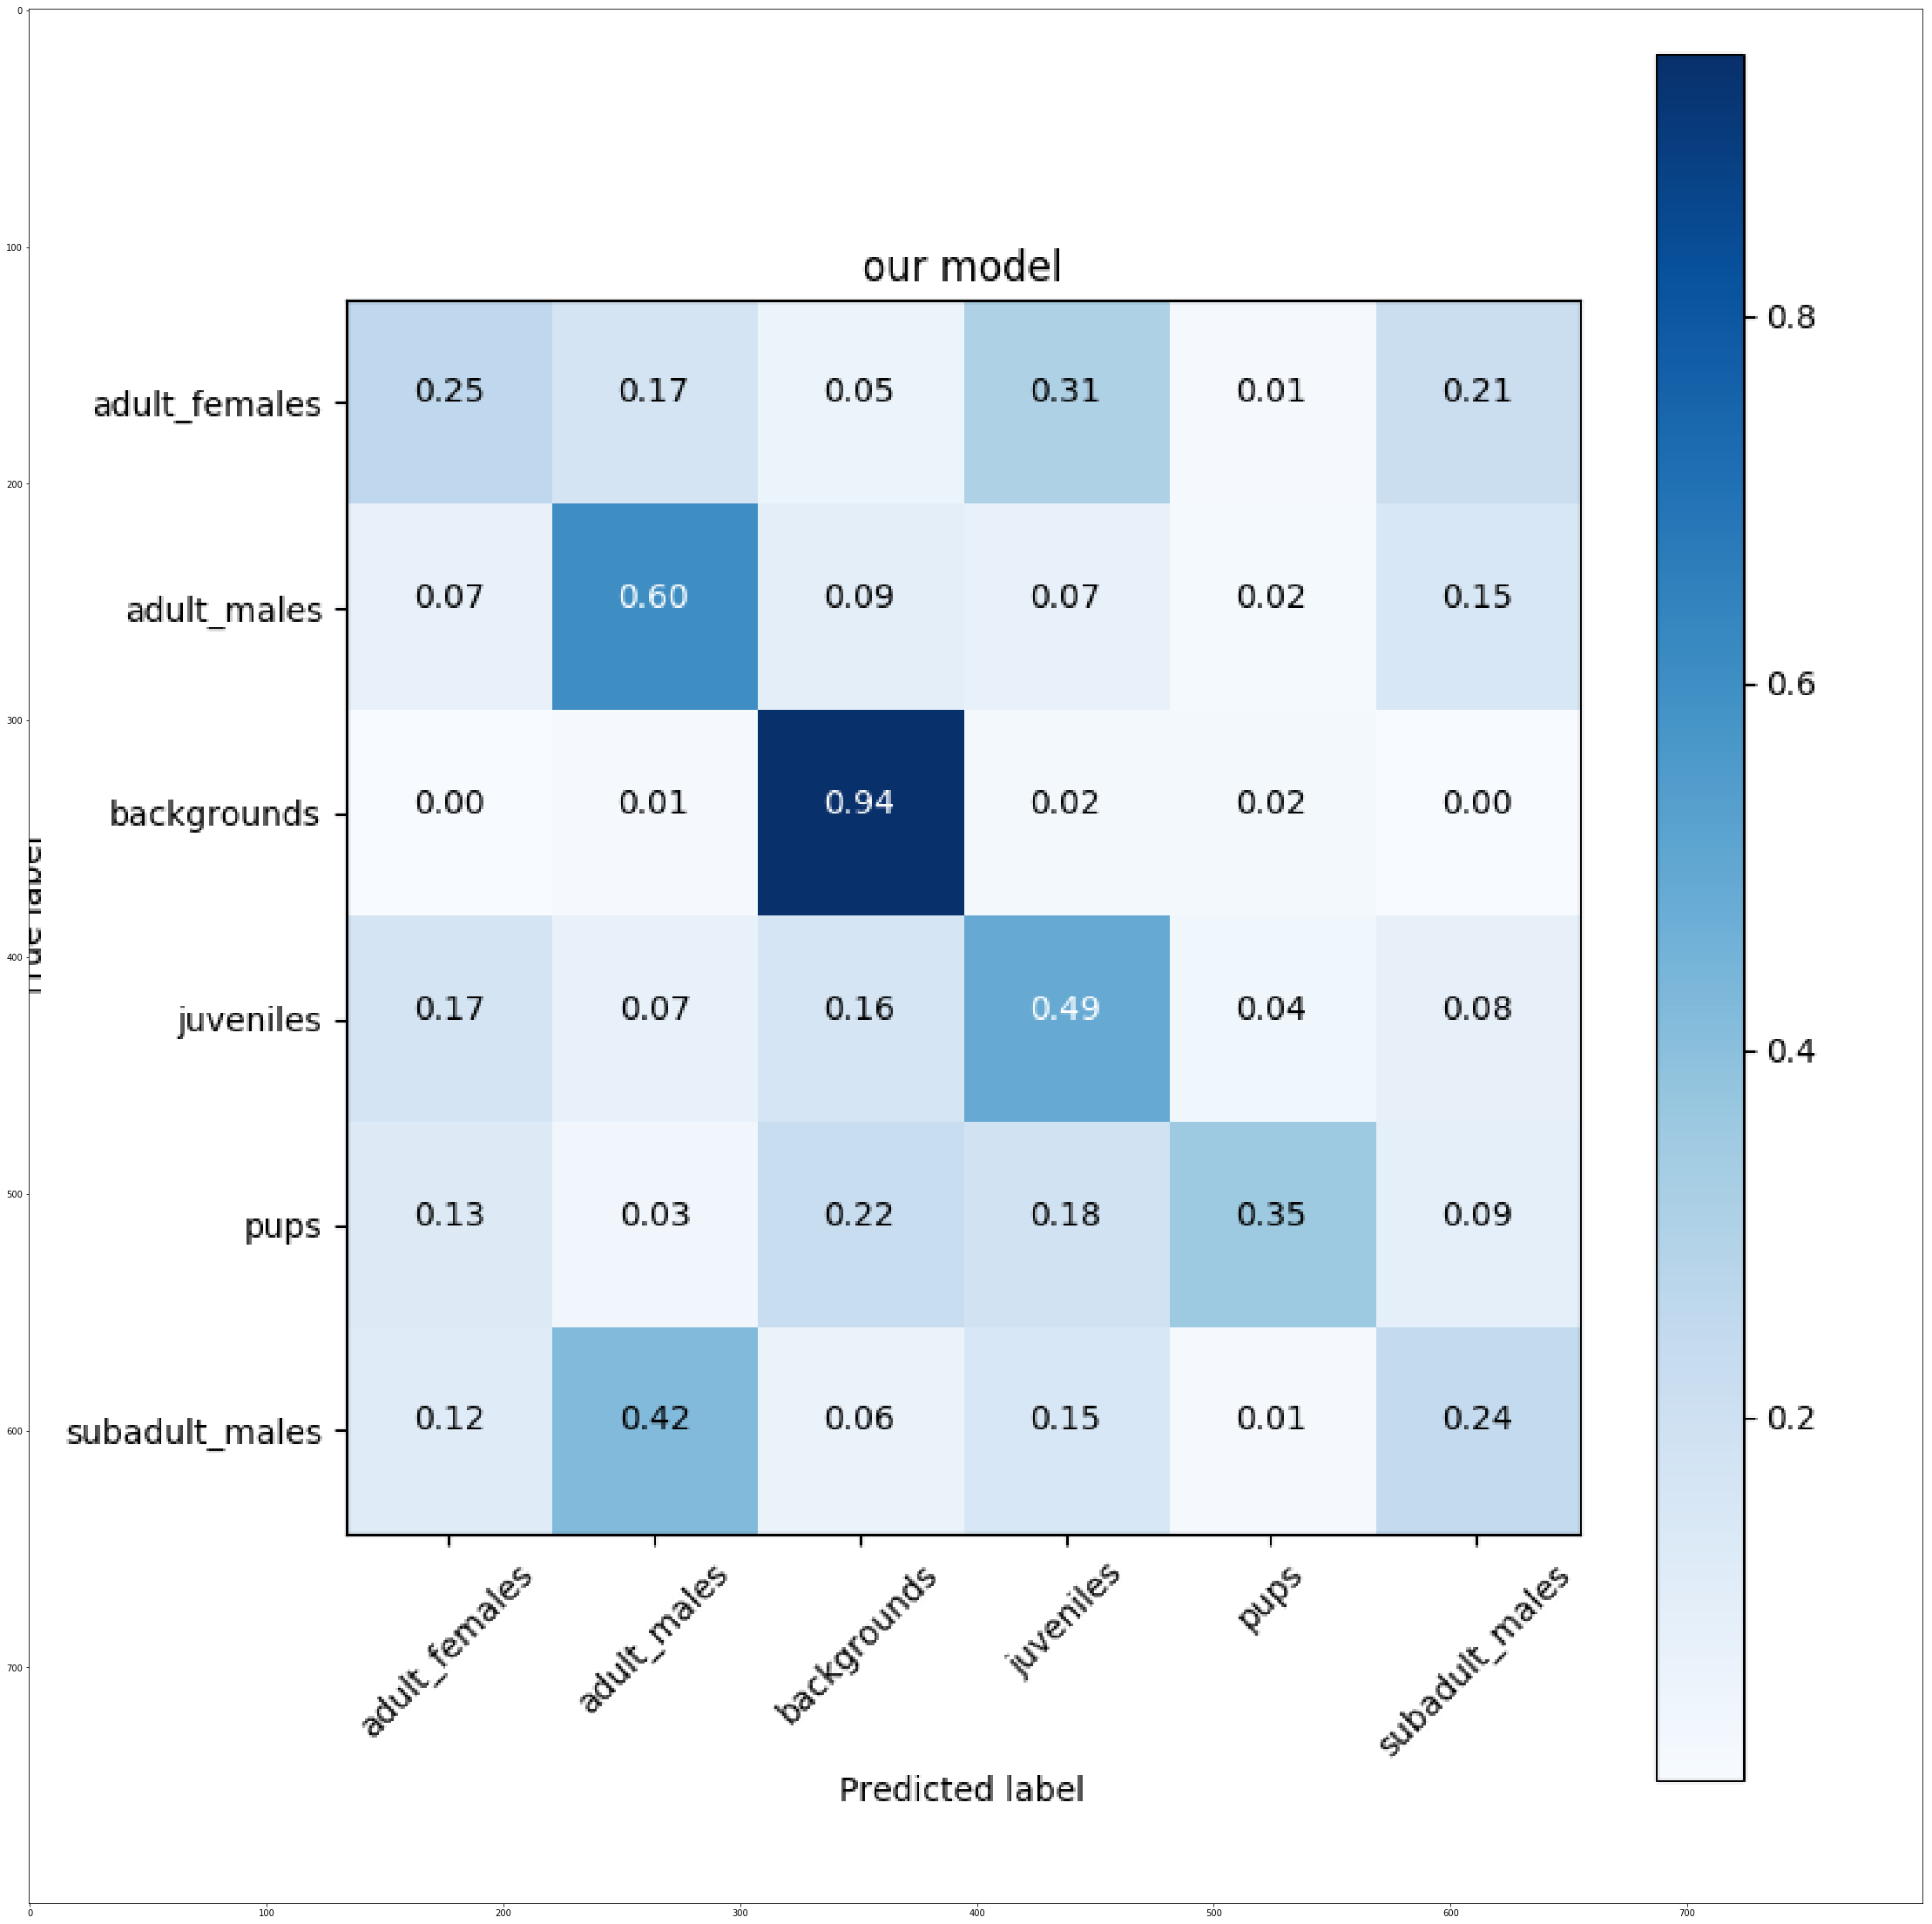

In [18]:
plt.figure(figsize=(40,40))
cm = plt.imread('/Users/YINAN/Documents/Code/Pycharm/Sealion/saved/pic/our_model_cm.png')
plt.imshow(cm)

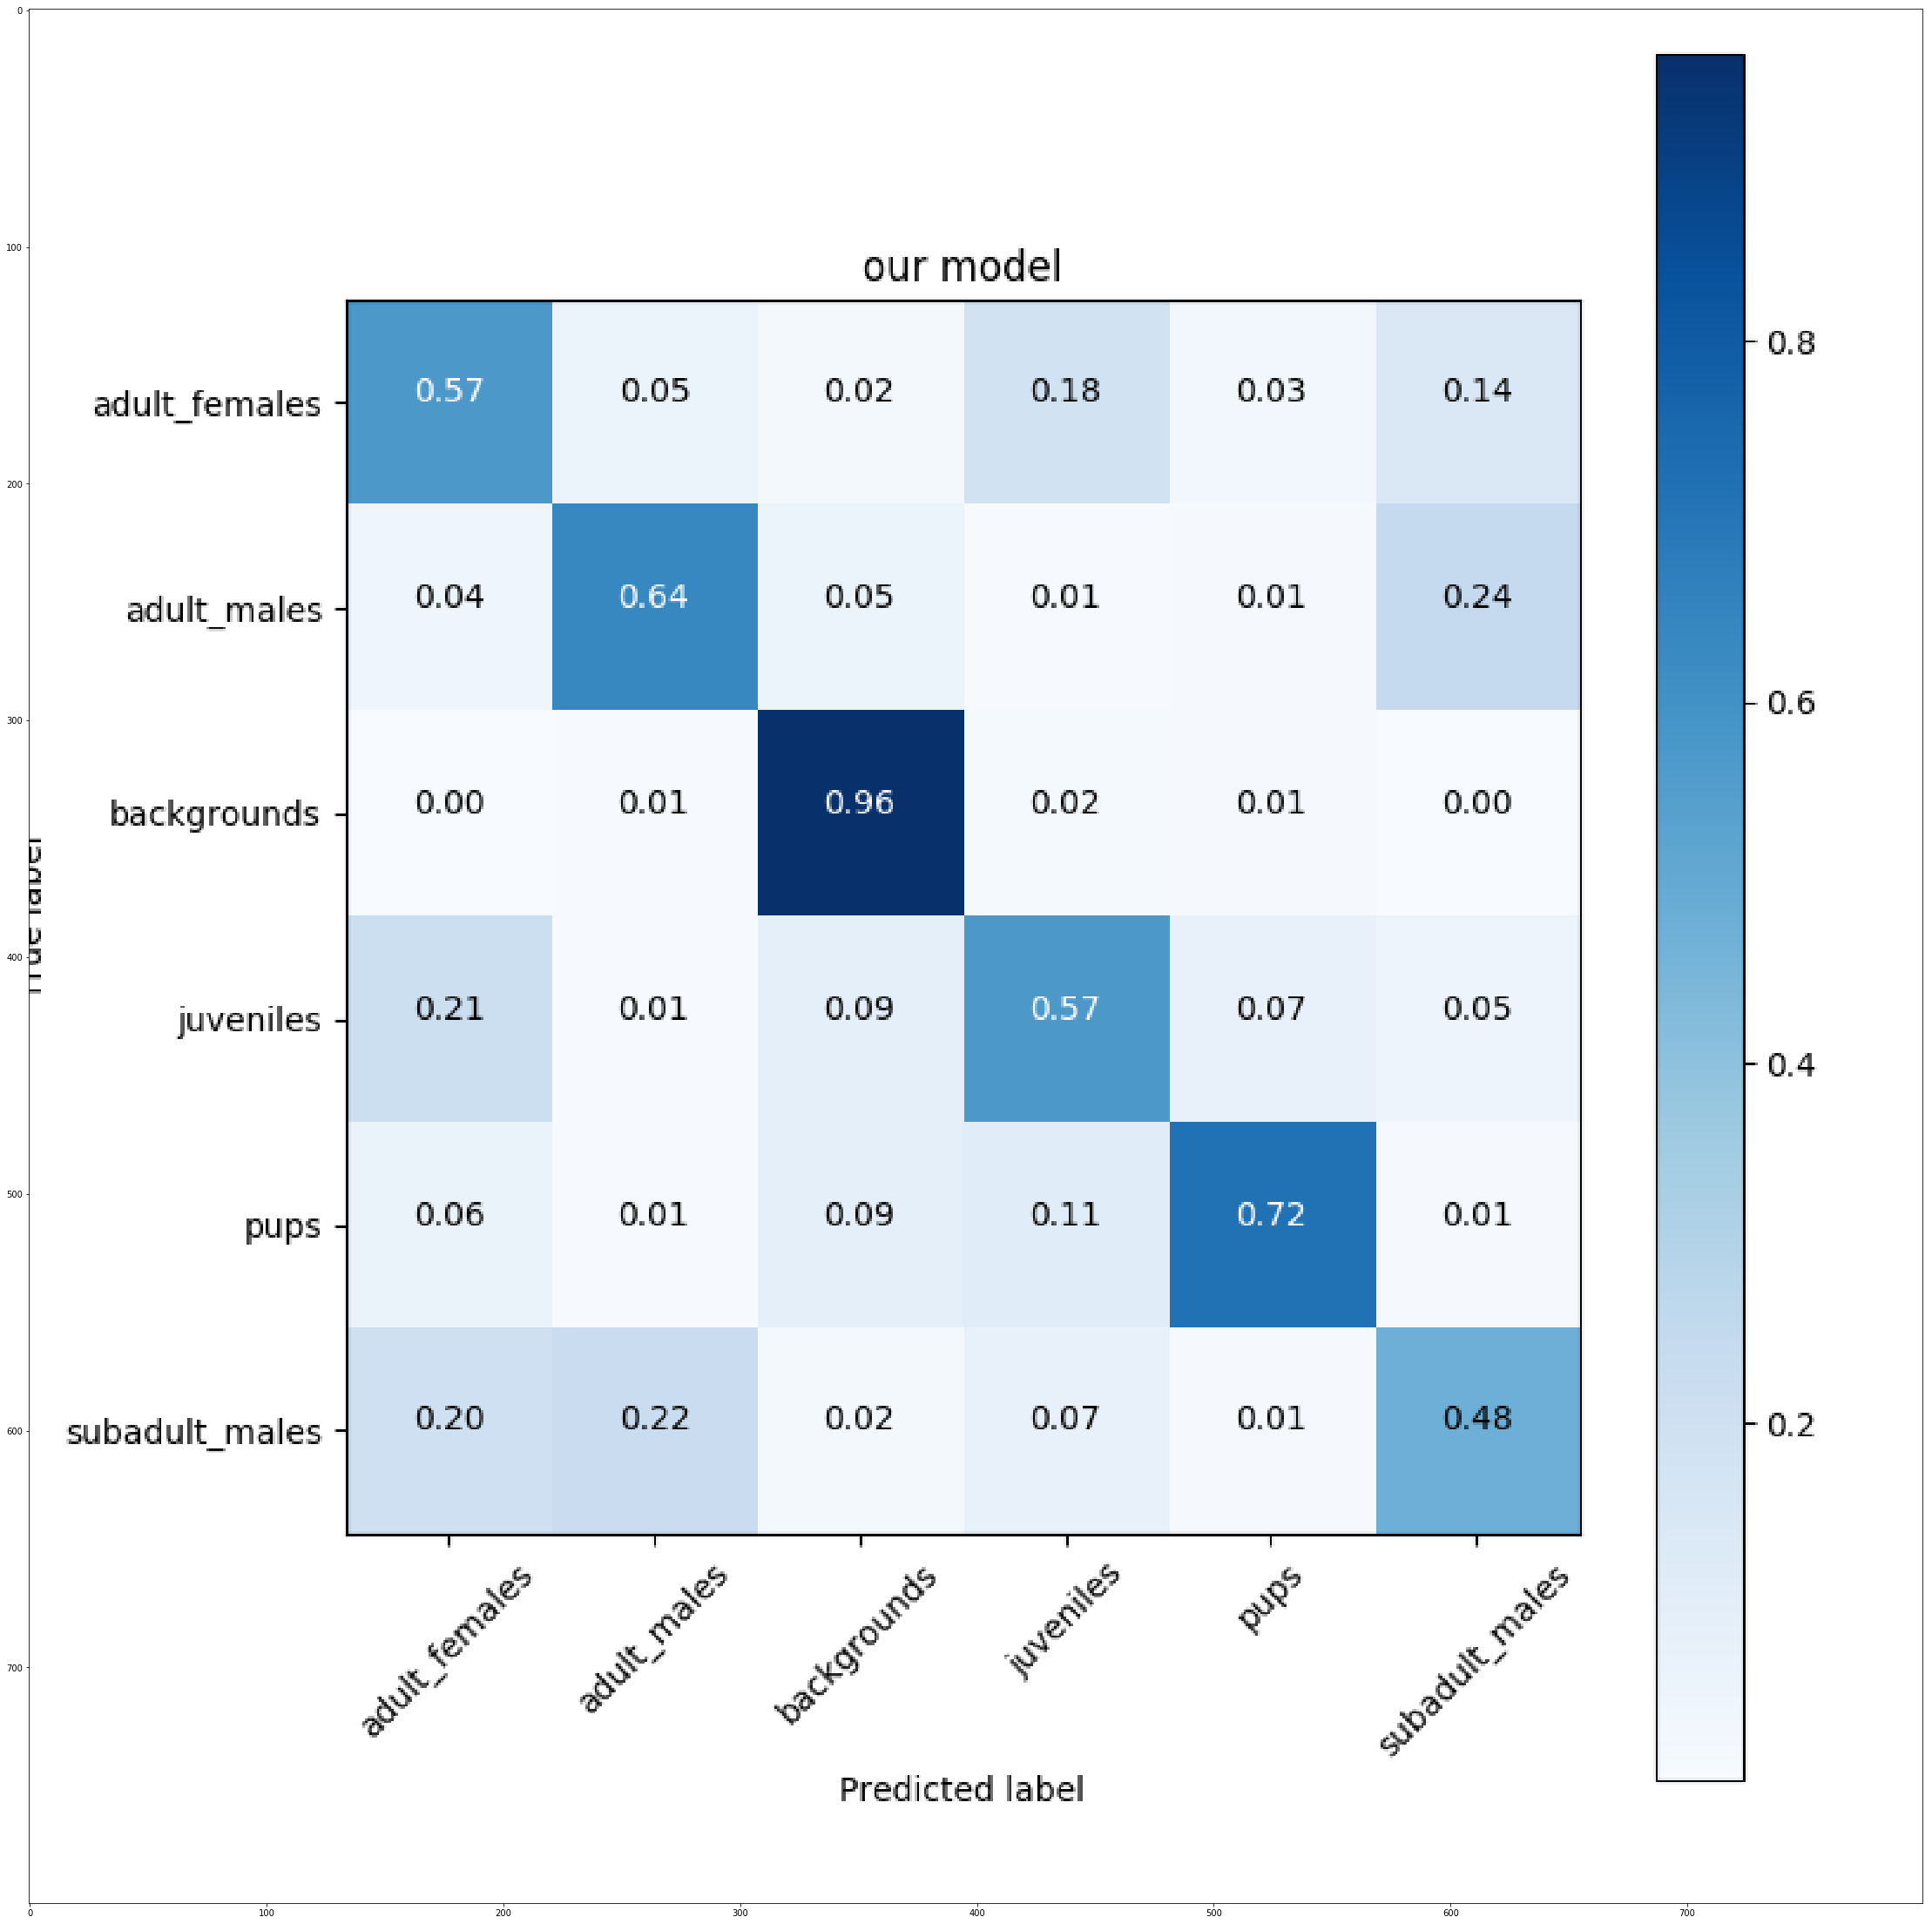

In [19]:
plt.figure(figsize=(40,40))
cm = plt.imread('/Users/YINAN/Documents/Code/Pycharm/Sealion/saved/pic/vgg_model_cm.png')
plt.imshow(cm)